In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as pc
import matplotlib as mpl
from matplotlib import ticker as tck
import scipy as sci
from scipy.signal import argrelextrema
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#not all these imports are needed, I just copy ones from other notebooks

% matplotlib inline

In [2]:
#Values used in equations

lam = 800*10**-9 #wavelength of laser, lambda, 800 nm 
length = 10**-3 #length of ZnTe crystal, L, 1 mm
indref = 2.8528 #index of refraction, eta or capital lambda, of ZnTe at 800 nm
r41 = 3.9*10**-12 #electro-optic coefficient r41 ZnTe pm/V

#ETHz can be changed to see different effects on plots
ETHz = 1000*10**3/10**-2  #THz electric field E strength, normallly MV/cm or kV/cm. 


ETHzlabel = ETHz*10**-2/10**3 #this is used in the axes labels, V/m -> kV/cm
angfreq = 2*np.pi*pc.c/lam  #angular frequency, omega, of 800 nm laser, Hz
#this is used in equation 9 in planken 
(ETHz*indref**3*r41*angfreq*length/(2*pc.c))
       

35.55809371646833

In [3]:
#alpha, the ETHz angle, from planken
n = 0
plankalphvar = np.linspace(n-np.pi/2,n+np.pi/2, 1000)
plankalphvar

array([-1.57079633, -1.56765159, -1.56450685, -1.56136211, -1.55821738,
       -1.55507264, -1.5519279 , -1.54878317, -1.54563843, -1.54249369,
       -1.53934895, -1.53620422, -1.53305948, -1.52991474, -1.52677   ,
       -1.52362527, -1.52048053, -1.51733579, -1.51419105, -1.51104632,
       -1.50790158, -1.50475684, -1.5016121 , -1.49846737, -1.49532263,
       -1.49217789, -1.48903315, -1.48588842, -1.48274368, -1.47959894,
       -1.47645421, -1.47330947, -1.47016473, -1.46701999, -1.46387526,
       -1.46073052, -1.45758578, -1.45444104, -1.45129631, -1.44815157,
       -1.44500683, -1.44186209, -1.43871736, -1.43557262, -1.43242788,
       -1.42928314, -1.42613841, -1.42299367, -1.41984893, -1.41670419,
       -1.41355946, -1.41041472, -1.40726998, -1.40412525, -1.40098051,
       -1.39783577, -1.39469103, -1.3915463 , -1.38840156, -1.38525682,
       -1.38211208, -1.37896735, -1.37582261, -1.37267787, -1.36953313,
       -1.3663884 , -1.36324366, -1.36009892, -1.35695418, -1.35

In [4]:
#theta, the the last index ellipsoid rotation, around x", from planken. The fast axis of the ZnTe waveplate.

plankthetavar = (-np.arctan(2*np.tan(plankalphvar))/2-n*np.pi/2)
plankthetavar

array([ 0.78539816,  0.78461198,  0.78382578,  0.78303956,  0.7822533 ,
        0.781467  ,  0.78068064,  0.77989421,  0.77910769,  0.77832109,
        0.77753438,  0.77674755,  0.77596059,  0.77517349,  0.77438625,
        0.77359883,  0.77281125,  0.77202347,  0.7712355 ,  0.77044732,
        0.76965891,  0.76887027,  0.76808139,  0.76729224,  0.76650283,
        0.76571314,  0.76492315,  0.76413286,  0.76334225,  0.76255131,
        0.76176004,  0.76096841,  0.76017641,  0.75938404,  0.75859128,
        0.75779812,  0.75700455,  0.75621055,  0.75541612,  0.75462124,
        0.7538259 ,  0.75303008,  0.75223378,  0.75143699,  0.75063968,
        0.74984186,  0.7490435 ,  0.74824459,  0.74744513,  0.74664509,
        0.74584447,  0.74504326,  0.74424144,  0.743439  ,  0.74263592,
        0.74183221,  0.74102783,  0.74022278,  0.73941706,  0.73861063,
        0.7378035 ,  0.73699565,  0.73618706,  0.73537773,  0.73456763,
        0.73375677,  0.73294512,  0.73213267,  0.73131942,  0.73

In [5]:
#phi, the probe laser angle, from planken
plankphivar = np.linspace(0,np.pi, 1000)
plankphivar

array([ 0.        ,  0.00314474,  0.00628947,  0.00943421,  0.01257895,
        0.01572369,  0.01886842,  0.02201316,  0.0251579 ,  0.02830264,
        0.03144737,  0.03459211,  0.03773685,  0.04088159,  0.04402632,
        0.04717106,  0.0503158 ,  0.05346054,  0.05660527,  0.05975001,
        0.06289475,  0.06603949,  0.06918422,  0.07232896,  0.0754737 ,
        0.07861843,  0.08176317,  0.08490791,  0.08805265,  0.09119738,
        0.09434212,  0.09748686,  0.1006316 ,  0.10377633,  0.10692107,
        0.11006581,  0.11321055,  0.11635528,  0.11950002,  0.12264476,
        0.1257895 ,  0.12893423,  0.13207897,  0.13522371,  0.13836845,
        0.14151318,  0.14465792,  0.14780266,  0.15094739,  0.15409213,
        0.15723687,  0.16038161,  0.16352634,  0.16667108,  0.16981582,
        0.17296056,  0.17610529,  0.17925003,  0.18239477,  0.18553951,
        0.18868424,  0.19182898,  0.19497372,  0.19811846,  0.20126319,
        0.20440793,  0.20755267,  0.21069741,  0.21384214,  0.21

<IPython.core.display.Javascript object>


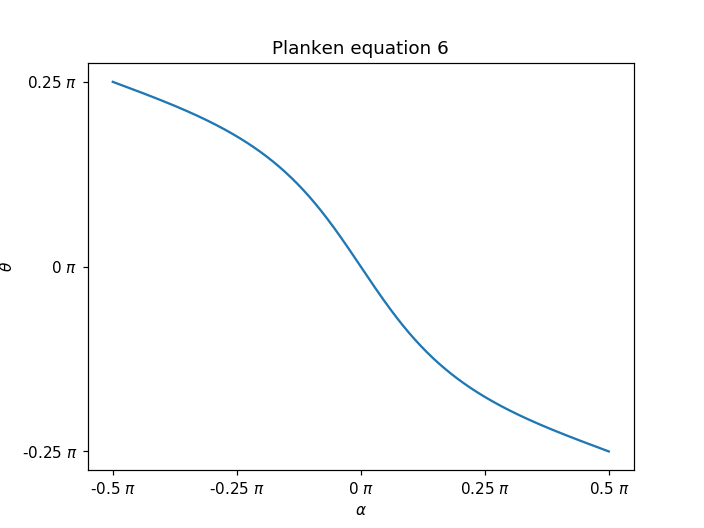

In [6]:
#this plots theta vs alpha; theta only goes up to +/- pi/4, 
#though can be more with different values of n in plankthetavar
#the maximum x" rotation occurs when alpha = pi/2
#alpha can be changed above to give more of a range, though the pattern just repeats itself

f,ax=plt.subplots(1)
ax.plot(plankalphvar/np.pi, plankthetavar/np.pi)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\theta$')
ax.set_title('Planken equation 6')
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.25))
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.25))


In [7]:
#this gives equation 8 in planken, delta I, for 3d plotting

plankphivarm, plankalphvarm= np.meshgrid(plankphivar, plankalphvar)

deltaIvar = (np.array(np.sin(2*(plankphivarm-(-np.arctan(2*np.tan(plankalphvarm))
        /2-n*np.pi/2)))*np.sin((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvarm)*(np.sin((-np.arctan(
    2*np.tan(plankalphvarm))/2-n*np.pi/2)))**2+np.cos(plankalphvarm+2*
    (-np.arctan(2*np.tan(plankalphvarm))/2-n*np.pi/2))-(np.cos(plankalphvarm)
    *(np.cos((-np.arctan(2*np.tan(plankalphvarm))/2-n*np.pi/2)))**2-
    np.cos(plankalphvarm+2*(-np.arctan(2*np.tan(plankalphvarm))/2-n*np.pi/2
                           )))))))

deltaIvar

array([[-0.90881865, -0.90880068, -0.90874675, ..., -0.90874675,
        -0.90880068, -0.90881865],
       [-0.90892752, -0.90890056, -0.90883764, ..., -0.90887359,
        -0.90891854, -0.90892752],
       [-0.90925376, -0.90921779, -0.90914586, ..., -0.90921779,
        -0.90925376, -0.90925376],
       ..., 
       [ 0.90925376,  0.90925376,  0.90921779, ...,  0.90914586,
         0.90921779,  0.90925376],
       [ 0.90892752,  0.90891854,  0.90887359, ...,  0.90883764,
         0.90890056,  0.90892752],
       [ 0.90881865,  0.90880068,  0.90874675, ...,  0.90874675,
         0.90880068,  0.90881865]])

<IPython.core.display.Javascript object>


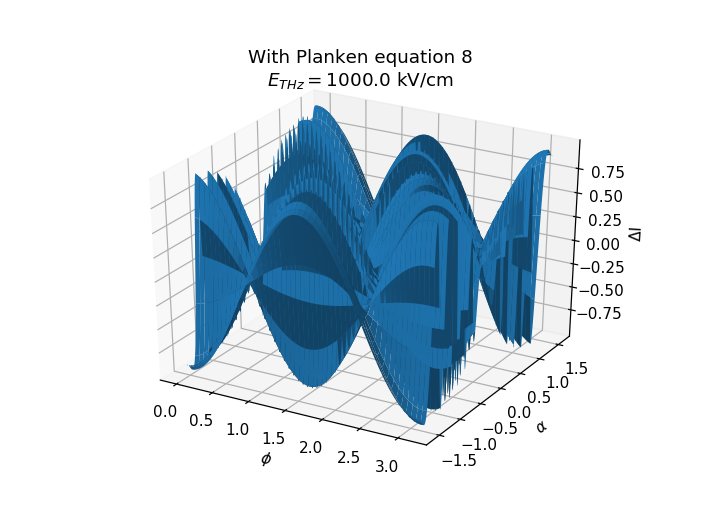

In [8]:
#plots equation 8 as a two variable function, alpha and phi, in 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel(r'$\Delta$I')
plt.title('With Planken equation 8\n$E_{THz}=$%s kV/cm' % ETHzlabel)
ax.plot_surface(plankphivarm,plankalphvarm,deltaIvar)

<IPython.core.display.Javascript object>


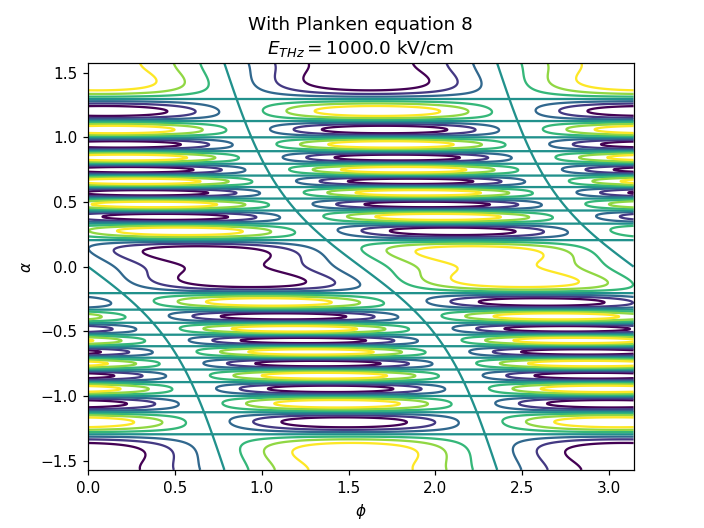

In [9]:
#contour plot of equation 8 as a two variable function

fig = plt.figure()
plt.contour(plankphivarm,plankalphvarm, deltaIvar)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\alpha$')
plt.title('With Planken equation 8\n$E_{THz}=$%s kV/cm' % ETHzlabel)
plt.show()

In [10]:
#delta I from equation 9 from planken, for 3d plotting, as a 2 variable function

approxdeltaIvar = (ETHz*indref**3*r41*angfreq*length/(2*pc.c))*(np.cos(plankalphvarm)
                                    *np.sin(2*plankphivarm) + 
                2*np.sin(plankalphvarm)*np.cos(2*plankphivarm))
approxdeltaIvar

array([[-71.11618743, -71.11478085, -71.11056115, ..., -71.11056115,
        -71.11478085, -71.11618743],
       [-71.11583579, -71.11372592, -71.10880298, ..., -71.11161608,
        -71.1151325 , -71.11583579],
       [-71.11478085, -71.11196772, -71.10634159, ..., -71.11196776,
        -71.11478086, -71.11478085],
       ..., 
       [ 71.11478085,  71.11478086,  71.11196776, ...,  71.10634159,
         71.11196772,  71.11478085],
       [ 71.11583579,  71.1151325 ,  71.11161608, ...,  71.10880298,
         71.11372592,  71.11583579],
       [ 71.11618743,  71.11478085,  71.11056115, ...,  71.11056115,
         71.11478085,  71.11618743]])

<IPython.core.display.Javascript object>


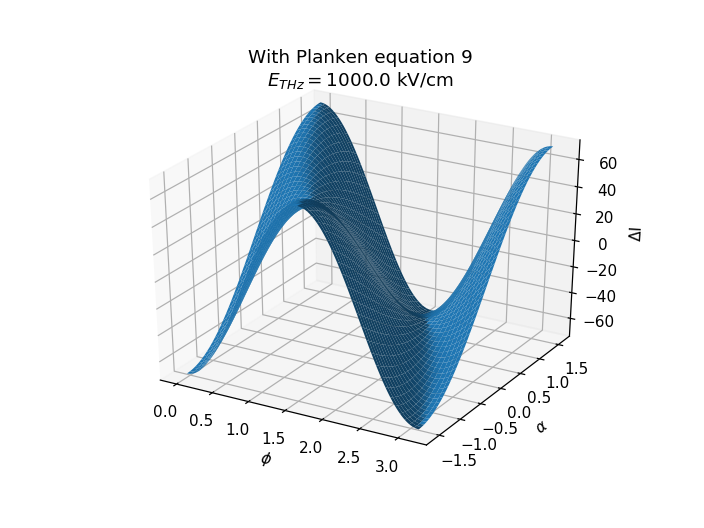

In [11]:
#plots equation 9 in 3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\alpha$')
ax.set_zlabel(r'$\Delta$I')
plt.title('With Planken equation 9\n$E_{THz}=$%s kV/cm' % ETHzlabel)
ax.plot_surface(plankphivarm,plankalphvarm,approxdeltaIvar)

<IPython.core.display.Javascript object>


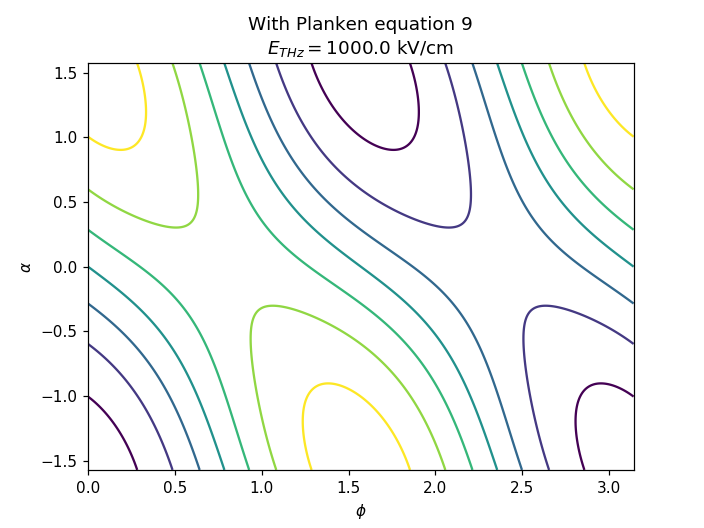

In [12]:
#contour plot of equation 8 as a two variable function

fig = plt.figure()
plt.contour(plankphivarm,plankalphvarm,approxdeltaIvar)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\alpha$')
plt.title('With Planken equation 9\n$E_{THz}=$%s kV/cm' % ETHzlabel)
plt.show()

In [13]:
#gives delta I in equation 9 in 2D plotting, for values given in figure 3

plankalphvarapprox = np.linspace(0,2*np.pi)

approxdeltaIequal = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))
approxdeltaI45 = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*(plankalphvarapprox+np.pi/4))+2*
        np.sin(plankalphvarapprox)*np.cos(2*(plankalphvarapprox+np.pi/4))))
approxdeltaI90 = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*(plankalphvarapprox+np.pi/2))+2*
        np.sin(plankalphvarapprox)*np.cos(2*(plankalphvarapprox+np.pi/2))))

<IPython.core.display.Javascript object>


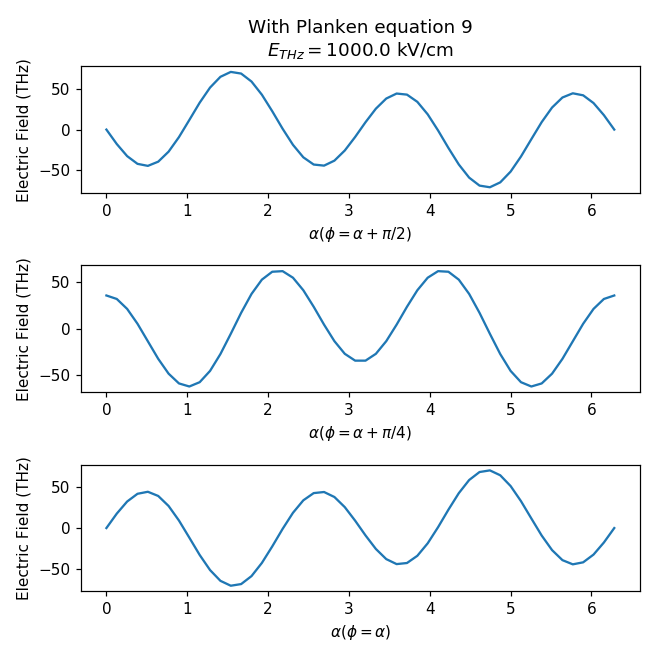

In [14]:
#recreates figure 3 with equation 9

plt.figure(figsize = (6,6))

plt.subplot(311)
plt.plot(plankalphvarapprox,approxdeltaI90)
plt.xlabel(r'$\alpha  (\phi = \alpha + \pi/2)$')
plt.ylabel('Electric Field (THz)')
plt.title('With Planken equation 9\n$E_{THz}=$%s kV/cm' % ETHzlabel)

plt.subplot(312)
plt.plot(plankalphvarapprox,approxdeltaI45)
plt.xlabel(r'$\alpha(\phi = \alpha + \pi/4)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$59 kV/cm')

plt.subplot(313)
plt.plot(plankalphvarapprox,approxdeltaIequal)
plt.xlabel(r'$\alpha(\phi = \alpha)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$54 kV/cm')

plt.tight_layout()
plt.show()

In [15]:
#gives delta I for equation 8 for 2D plotting, to recreate figure 3 

plankalphvar2 = np.linspace(0, 2*np.pi, 1000)

deltaIvarequal = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

deltaIvar45 = (np.array(np.sin(2*((plankalphvar2+np.pi/4)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))
deltaIvar90 = (np.array(np.sin(2*((plankalphvar2+np.pi/2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

<IPython.core.display.Javascript object>


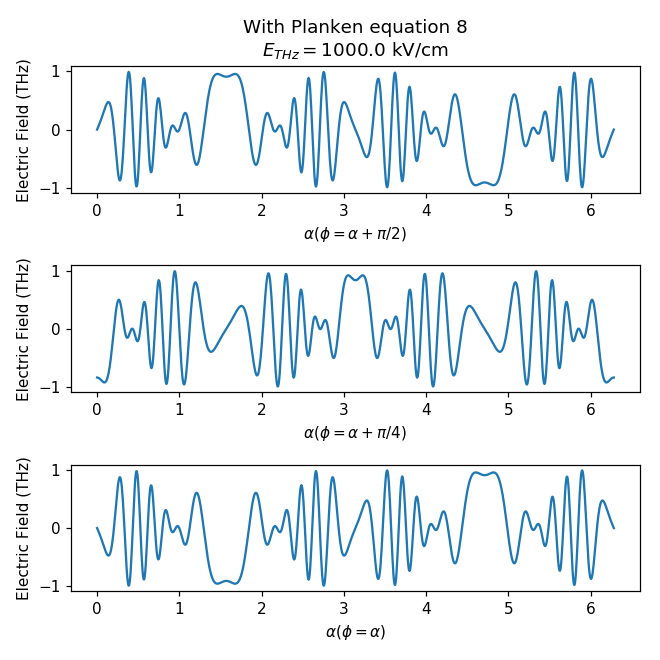

In [16]:
#plots equation 8, which recreates figure 3 (at low fields, less than 22 kV/cm)

plt.figure(figsize = (6,6))

plt.subplot(311)
plt.plot(plankalphvar2,deltaIvar90)
plt.xlabel(r'$\alpha(\phi = \alpha + \pi/2)$')
plt.ylabel('Electric Field (THz)')
plt.title('With Planken equation 8\n$E_{THz}=$%s kV/cm' % ETHzlabel)

plt.subplot(312)
plt.plot(plankalphvar2,deltaIvar45)
plt.xlabel(r'$\alpha(\phi = \alpha + \pi/4)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$59 kV/cm')

plt.subplot(313)
plt.plot(plankalphvar2,deltaIvarequal)
plt.xlabel(r'$\alpha(\phi = \alpha)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$54 kV/cm')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


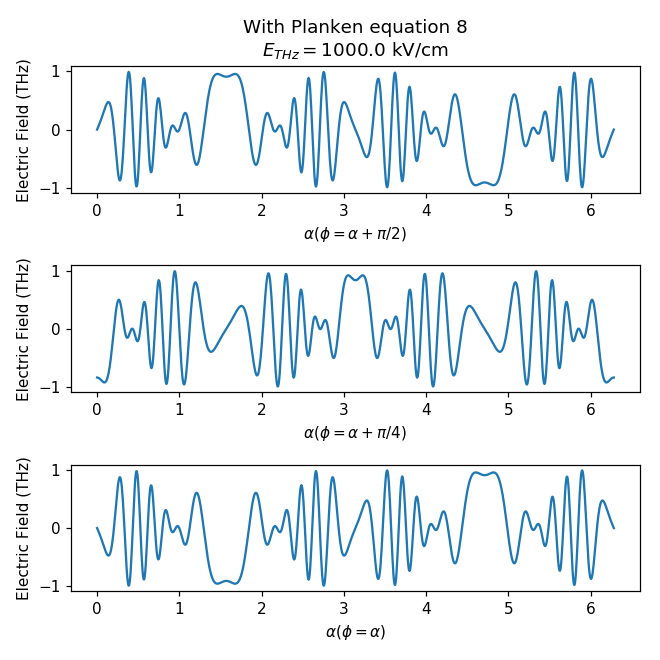

In [17]:
#plots equation 8, which recreates figure 3 (at low fields)
#but can left not run to compare to different values in the last cell

plt.figure(figsize = (6,6))

plt.subplot(311)
plt.plot(plankalphvar2,deltaIvar90)
plt.xlabel(r'$\alpha(\phi = \alpha + \pi/2)$')
plt.ylabel('Electric Field (THz)')
plt.title('With Planken equation 8\n$E_{THz}=$%s kV/cm' % ETHzlabel)

plt.subplot(312)
plt.plot(plankalphvar2,deltaIvar45)
plt.xlabel(r'$\alpha(\phi = \alpha + \pi/4)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$59 kV/cm')

plt.subplot(313)
plt.plot(plankalphvar2,deltaIvarequal)
plt.xlabel(r'$\alpha(\phi = \alpha)$')
plt.ylabel('Electric Field (THz)')
#plt.title('Maximum $E_{THz}=$54 kV/cm')

plt.tight_layout()
plt.show()

In [189]:
#Gives delta I for equation 8 for 2D plotting, with equation 9 overlayed on each plot
#to recreate the bottom plot in figure 3 (only recreating it in low fields), 
#where theta(probe)=theta(alpha) 
#(or theta = alpha with Planken's angle labels)
#Change ETHz values here to show different scale plots in the next cell

plankalphvar2 = np.linspace(0, 2*np.pi, 1000)

ETHz1 = 20*10**3/10**-2  #THz electric field E strength, normally kV/cm. 
ETHz2 = 40*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz3 = 60*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz4 = 1000*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz5 = 2000*10**3/10**-2  #THz electric field E strength, normally kV/cm.

deltaIvarequal1 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal1 = ((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))


deltaIvarequal2 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal2 = ((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal3 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal3 = ((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal4 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal4 = ((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal5 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal5 = ((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

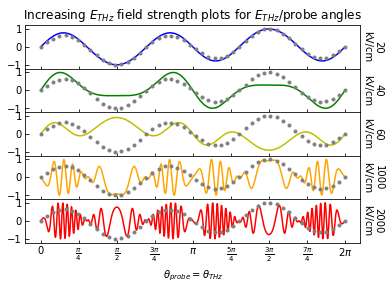

In [192]:
#plots equation 8, which recreates figure 3 at low fields
#but can plot again to show behavior at higher fields


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, sharey = True, 
                                         gridspec_kw =  
                                            {'hspace': 0})

ax1.plot(plankalphvar2/np.pi,deltaIvarequal1, 'b-') #equation 8
#ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1, '.', color = 'gray') #equation 9, 
#this or the next line can be commented out to show it normalized or not, this is repeated for each plot
ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1/np.max(approxdeltaIequal1), '.', color = 'gray')
ax1.set_title('Increasing $E_{THz}$ field strength plots for $E_{THz}$/probe angles')
ax1.set_ylabel('%s\nkV/cm' % int(ETHz1/10**5), rotation = 270)
#ax1.yaxis.tick_right()
#ax1.yaxis.set_ticks_position('both')
ax1.tick_params(direction="in")
ax1.set_ylim([-1.2,1.2])
ax1.yaxis.set_label_position("right")
ax1.yaxis.set_label_coords(1.07,0.5)

ax2.plot(plankalphvar2/np.pi,deltaIvarequal2, 'g-')
#ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2, '.', color = 'gray')
ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2/np.max(approxdeltaIequal2), '.', color = 'gray')
ax2.set_ylabel('%s\nkV/cm' % int(ETHz2/10**5), rotation = 270)
ax2.tick_params(direction="in")
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_label_coords(1.07,0.5)


ax3.plot(plankalphvar2/np.pi,deltaIvarequal3, 'y-')
#ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3, '.', color = 'gray')
ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3/np.max(approxdeltaIequal3), '.', color = 'gray')
ax3.set_ylabel('%s\nkV/cm' % int(ETHz3/10**5), rotation = 270)
ax3.tick_params(direction="in")
ax3.yaxis.set_label_position("right")
ax3.yaxis.set_label_coords(1.07,0.5)

ax4.plot(plankalphvar2/np.pi,deltaIvarequal4, color = 'orange')
#ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4, '.', color = 'gray')
ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4/np.max(approxdeltaIequal4), '.', color = 'gray')
ax4.set_ylabel('%s\nkV/cm' % int(ETHz4/10**5), rotation = 270) 
ax4.tick_params(direction="in")
ax4.yaxis.set_label_position("right")
ax4.yaxis.set_label_coords(1.07,0.5)

ax5.plot(plankalphvar2/np.pi,deltaIvarequal5, 'r-')
#ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5, '.', color = 'gray')
ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5/np.max(approxdeltaIequal5), '.', color = 'gray')
ax5.set_ylabel('%s\nkV/cm' % int(ETHz5/10**5), rotation = 270) 
ax5.yaxis.set_label_position("right")
ax5.yaxis.set_label_coords(1.07,0.5)
ax5.tick_params(direction="in")
ax5.set_xlabel(r'$\theta_{probe}=\theta_{THz}$')
xticklabels = [0,r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',
               r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$']
#ax5.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.xticks([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],xticklabels)
#plt.setp(ax5, xticklabels=xticklabels)


#fig.tight_layout()
plt.savefig('plankenequation8.pdf')